# Phase 4 Project Submission

- Student name: Lucas Wilkerson
- Student pace: Flex/part time
- Scheduled project review date/time:
- Instructor name: Morgan Jones


# Pneumonia Detection and Classification

## Project Overview




## Business Problem and Stakeholder



## Data Understanding

## Data Preparation/ Preprocessing

## Data Analysis/ Data Visualization

## Modeling

## Hyperparamater Tuning 

## Model Evaluation

## Conclusion and Recommendations

## Limitations

# Building baseline neural network model

In [1]:
#Start by building a baseline neural network

# Don't for get to check distribution, check for duplicates, nans
# get statistics if needed/useful 

#importing necessary packages

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
import numpy as np
import os


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # This prevents kernel shut down due to xgboost conflict
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # This line prevents tf's comments about the optimizing your machine

In [2]:
# Directory path
train_dir = 'chest_xray/train/'
test_dir = 'chest_xray/test/'
val_dir = 'chest_xray/val/'

# Preprocess the images into tensors
# Rescale the data by 1/.255 and use binary_crossentropy loss

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Get all the data in the directory chest_xray/train (5216 images) and reshape them
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150), batch_size=5216, class_mode='binary')

# Get all the data in the directory chest_xray/test (624 images) , and reshape them
test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size=(150, 150), batch_size=624, class_mode='binary')


# Get all the data in the directory chest_xray/val (16 images), and reshape them
val_generator = val_datagen.flow_from_directory(
        val_dir, 
        target_size=(150, 150), batch_size=16, class_mode='binary')

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Inspect and Prepare Data

### Viewing some images from the datasets 

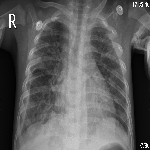

In [3]:
# Datasets are now six numpy arrays 

# Viewing image from train group

array_to_img(train_images[10])

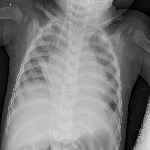

In [4]:
array_to_img(train_images[130])

In [5]:
sample_image = train_images[0]
sample_image

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.17254902, 0.17254902, 0.17254902],
        [0.13333334, 0.13333334, 0.13333334],
        [0.12156864, 0.12156864, 0.12156864]],

       [[0.00784314, 0.00784314, 0.00784314],
        [0.01960784, 0.01960784, 0.01960784],
        [0.01960784, 0.01960784, 0.01960784],
        ...,
        [0.18431373, 0.18431373, 0.18431373],
        [0.15686275, 0.15686275, 0.15686275],
        [0.13725491, 0.13725491, 0.13725491]],

       [[0.01176471, 0.01176471, 0.01176471],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        ...,
        [0.19607845, 0.19607845, 0.19607845],
        [0.18039216, 0.18039216, 0.18039216],
        [0.14901961, 0.14901961, 0.14901961]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [6]:
sample_label = train_labels[0]
sample_label

1.0

In [9]:
# Get value counts
unique_elements, counts = np.unique(train_labels, return_counts=True)

# Combine the unique elements and their counts into a dictionary
value_counts_dict = dict(zip(unique_elements, counts))

# Print the result
print(value_counts_dict)

{0.0: 1341, 1.0: 3875}


Training set contains 1341 individuals classfied as normal and 3875 individuals classified with pneumonia

In [10]:
print("Image Dataset Shape")
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

print("Label Dataset Shape")
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)



Image Dataset Shape
(5216, 150, 150, 3)
(624, 150, 150, 3)
(16, 150, 150, 3)
Label Dataset Shape
(5216,)
(624,)
(16,)


In [11]:
# Reshaping dataset
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 67500)
(624, 67500)
(16, 67500)


In [13]:
# Reshaping labels
train_y = np.reshape(train_labels, (5216,1))
test_y = np.reshape(test_labels, (624,1))
val_y = np.reshape(val_labels, (16,1))

print(train_y.shape)
print(test_y.shape)
print(val_y.shape)

(5216, 1)
(624, 1)
(16, 1)


In [16]:
# Preprocessing Our Labels 

# Viewing first 10 labels
train_y[:10]

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [15]:
# Viewing class indices
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

### Building Model 

In [25]:
# Initial baseline model

model_1 = Sequential()
model_1.add(Dense(64, activation='tanh', input_shape=(67500,)))
model_1.add(Dense(1, activation='sigmoid'))

In [26]:
# Compiling model with following parameters
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [27]:
# Inspecting model summary

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                4320064   
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,320,129
Trainable params: 4,320,129
Non-trainable params: 0
_________________________________________________________________


In [28]:
results_1 = model_1.fit(train_img, train_y, 
                        epochs=5, 
                        batch_size=64, 
                        validation_data=(val_img, val_y))

Epoch 1/5
82/82 [==============================] - 12s 124ms/step - loss: 1.9012 - accuracy: 0.7429 - val_loss: 2.4367 - val_accuracy: 0.5000
Epoch 2/5
82/82 [==============================] - 8s 96ms/step - loss: 0.7892 - accuracy: 0.7429 - val_loss: 0.8303 - val_accuracy: 0.5000
Epoch 3/5
82/82 [==============================] - 7s 88ms/step - loss: 0.5709 - accuracy: 0.7429 - val_loss: 0.8143 - val_accuracy: 0.5000
Epoch 4/5
82/82 [==============================] - 7s 85ms/step - loss: 0.5704 - accuracy: 0.7429 - val_loss: 0.8253 - val_accuracy: 0.5000
Epoch 5/5
82/82 [==============================] - 7s 83ms/step - loss: 0.5703 - accuracy: 0.7429 - val_loss: 0.8239 - val_accuracy: 0.5000


In [30]:
# Training Results 
results_train = model_1.evaluate(train_img, train_y)

# Test Results 

results_test = model_1.evaluate(test_img, test_y)

20/20 [==============================] - 1s 25ms/step - loss: 0.6933 - accuracy: 0.6250


In [31]:
print('Train Results:', results_train)
print('Test Results:', results_test)

Train Results: [0.5700200796127319, 0.7429064512252808]
Test Results: [0.6932506561279297, 0.625]


Initial model shows accuracy of %74.2 with training group and %62.5 with the test group. Not the best performing model and does seem to over fit some due to training score being higher than test score. 

# Utilizing Data Augmentation to increase number of samples for smaller sets

datagen = ImageDataGenerator(rotation_range=20, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True)

# Create a generator for augmented data
augmented_train_data = datagen.flow(train_images, train_labels, batch_size=64)

# Use augmented data for training
model.fit(augmented_train_data, epochs=5, validation_data=(val_images, val_labels))


# Fitting the model 

#class_weights = {0: 1, 1: 5}  # Adjust weights based on the class distribution

results_1 = model_1.fit(train_images_reshaped, train_labels_final, 
                        epochs=5, 
                        batch_size=64, 
                        validation_data=(val_images_reshaped, val_labels_final))

  #                      class_weight= class_weights)

### Visualizing loss and accuracy curves

In [ ]:
# Creating function to plot loss and accuracy curves

def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [ ]:
# Viewing results 

visualize_training_results(results_1)

# First approach below

In [5]:
# Getting the shape of the data

print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))
print(np.shape(val_images))
print(np.shape(val_labels))

(5216, 150, 150, 3)
(5216, 2)
(624, 150, 150, 3)
(624, 2)
(16, 150, 150, 3)
(16, 2)


In [6]:
# Reshaping the train_images
train_img_unrow = train_images.reshape(5216, -1).T

#Previewing the shape of the train_img_unrow

np.shape(train_img_unrow)

(67500, 5216)

In [7]:
# Reshaping test_images
m = 624
test_img_unrow = test_images.reshape(m, -1).T

# Previewing the shape of test_img_unrow
np.shape(test_img_unrow)

(67500, 624)

In [8]:
# Reshaping val_images
val_img_unrow = val_images.reshape(16, -1).T

# Previewing the shape of test_img_unrow
np.shape(val_img_unrow)

(67500, 16)

In [9]:
# Viewing test_labels, train_labels, val_labels
train_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [10]:
# Viewing class indices
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [11]:
# Reshaping train labels
train_labels_final = train_labels.T[[1]]
np.shape(train_labels_final)

(1, 5216)

In [12]:
# Reshaping test labels
test_labels_final = test_labels.T[[1]]
np.shape(test_labels_final)

(1, 624)

In [13]:
# Reshaping val labels
val_labels_final = val_labels.T[[1]]
np.shape(val_labels_final)

(1, 16)

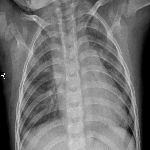

In [14]:
# Checking/ previewing image with label

array_to_img(train_images[10])



In [15]:
train_labels_final[:,10]

array([1.], dtype=float32)

## Standardize the data


In [16]:
#Remember that each RGB pixel in an image takes a value between 0 and 255. 
#In Deep Learning, it is very common to standardize and/or center your dataset. 
#For images, a common thing that is done is to make sure each pixel value is between 0 and 1. 
#This can be done by dividing the entire matrix by 255. 

In [17]:
# Standardizing the data

train_img_final = train_img_unrow/255
test_img_final = test_img_unrow/255
val_img_final = val_img_unrow/255

type(test_img_unrow)

numpy.ndarray

## Building Basic Logistic Regression-Based Neural Network

In [18]:
# Initializing b as a scalar with the value of 0
b = 0

# Initializing w by defining a function

def init_w(n):
    w = np.zeros((n, 1))
    return w


w = init_w(150*150*3)

In [19]:
# Forward Propagation

def propagation(w, b, x, y):
    l = x.shape[1]
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b)))                                  
    cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))    
    dw = (1/l) * np.dot(x,(y_hat - y).T)
    db = (1/l) * np.sum(y_hat - y)
    return dw, db, cost


In [20]:
# Running function on train dataset
dw, db, cost = propagation(w, b, train_img_final, train_labels_final)

print(dw)

print(db)

print(cost)

[[-0.05110181]
 [-0.05110181]
 [-0.05110181]
 ...
 [-0.02937868]
 [-0.02937868]
 [-0.02937868]]
-0.2429064417177914
0.6931471805599453


In [21]:
# Optimization
# Update w and b 

# Defining optimization function

def optimization(w, b, x, y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        dw, db, cost = propagation(w, b, x, y)    
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the costs and print them every 50 iterations
        if i % 50 == 0:
            costs.append(cost)
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return w, b, costs

In [22]:
# Running optimization function
w, b, costs = optimization(w, b, train_img_final, train_labels_final, 
                           num_iterations= 151, learning_rate = 0.0001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 50: 0.529941
Cost after iteration 100: 0.493746
Cost after iteration 150: 0.463483


In [23]:
# Make label predictions
# Creating function that makes label predictions
def prediction(w, b, x):
    l = x.shape[1]
    y_prediction = np.zeros((1, l))
    w = w.reshape(x.shape[0], 1)
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b))) 
    p = y_hat
    
    for i in range(y_hat.shape[1]):
        if (y_hat[0,i] > 0.5): 
            y_prediction[0, i] = 1
        else:
            y_prediction[0, i] = 0
    return y_prediction

In [24]:
w = np.array([[0.035], [0.123], [0.217]])
b = 0.2
x = np.array([[0.2, 0.4, -1.2, -2], 
              [1, -2., 0.1, -1], 
              [0.2, 0.4, -1.2, -2]])

prediction(w, b, x)

array([[1., 1., 0., 0.]])

## The Overall Model

In [25]:
# Building the model

def model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    b = 0
    w = init_w(np.shape(x_train)[0]) 

    # Gradient descent (≈ 1 line of code)
    w, b, costs = optimization(w, b, x_train, y_train, num_iterations, learning_rate, print_cost)
    
    y_pred_test = prediction(w, b, x_test)
    y_pred_train = prediction(w, b, x_train)

    # Print train/test errors
    print('train accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print('test accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

    output = {'costs': costs, 
              'y_pred_test': y_pred_test,  
              'y_pred_train' : y_pred_train,  
              'w' : w, 
              'b' : b, 
              'learning_rate' : learning_rate, 
              'num_iterations': num_iterations}
    
    return output

In [26]:
# Running the model
output = model(train_img_final, train_labels_final, test_img_final, test_labels_final,
               num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147


<ipython-input-19-eea2987a392b>:6: RuntimeWarning: divide by zero encountered in log
  cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))
<ipython-input-19-eea2987a392b>:6: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))


Cost after iteration 50: 3.446588
Cost after iteration 100: nan
Cost after iteration 150: nan
Cost after iteration 200: 0.215157
Cost after iteration 250: 0.182180
Cost after iteration 300: nan
Cost after iteration 350: 0.175833
Cost after iteration 400: 0.155291
Cost after iteration 450: 0.141642
Cost after iteration 500: 0.132090
Cost after iteration 550: 0.125250
Cost after iteration 600: 0.120236
Cost after iteration 650: 0.116441
Cost after iteration 700: 0.113444
Cost after iteration 750: 0.110962
Cost after iteration 800: 0.110268
Cost after iteration 850: 0.120192
Cost after iteration 900: 0.114449
Cost after iteration 950: 0.110477
Cost after iteration 1000: 0.107543
Cost after iteration 1050: 0.105230
Cost after iteration 1100: 0.127746
Cost after iteration 1150: 0.105470
Cost after iteration 1200: nan
Cost after iteration 1250: 0.106541
Cost after iteration 1300: 0.103251
Cost after iteration 1350: 0.100811
Cost after iteration 1400: 0.098875
Cost after iteration 1450: 0.097

In [27]:
# Train Accuracy of 96.7 %
# Test Accuracy of 74.7 % 

# From the results we can see that the model does seem to be overfitting onto the training data 

# Build Neural Network with Keras Example

# Importing necessary classes
from keras import models
from keras import layers
from keras import optimizers

# Deciding on network architecture 

model = models.Sequential()

# Add layers 
model.add(layers.Dense(units, activation, input_shape))

# Compile model 
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='mse',
              metrics=['accuracy'])

# Train the model 

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# For plotting can return a history on how training went 

history.history

# Or for loss specifically 

history.history['loss']

# Making predictions 
y_hat = model.predict(x)

# Evaluating the model- train data
model.evaluate(X_train, X_train_labels)

# Evaluating the model- test data
model.evaluate(X_test, X_test_labels)

# Image Classification with Multi-Layer Perceptron using Keras

In [29]:
# Importing necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # This prevents kernel shut down due to xgboost conflict
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # This line prevents tf's comments about the optimizing your machine

In [32]:
# train_img_final, train_labels_final 
# test_img_final, test_labels_final
# val_img_final, val_labels_final 


#Previewing image using Matplotlib
sample_image = train_img_final[0]
sample_label = train_labels_final[0]


In [33]:
sample_image

array([0.07450981, 0.01176471, 0.16078432, ..., 0.35686275, 0.        ,
       0.        ], dtype=float32)

In [34]:
 train_img_final.shape

(67500, 5216)